In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./HW3/Cost per employee.csv')
data.head()

,employee,cost
0,80,30.744411
1,65,33.768413
2,2,86.702561
3,100,36.646069
4,50,31.848279


In [3]:
data.describe()

,employee,cost
count,500.000000,500.000000
mean,53.104000,34.395712
std,28.951434,16.180156
min,1.000000,9.031068
25%,30.000000,25.200552
50%,52.000000,30.931065
75%,79.000000,36.885529
max,101.000000,95.817012


In [4]:
34+3*16,34-3*16

(82, -14)

In [5]:
data[data['cost']>82]

,employee,cost
2,2,86.702561
5,3,88.250529
22,3,93.458527
66,5,87.714306
102,3,89.544801
109,2,95.817012
114,2,94.266323
115,4,89.687954
123,5,89.880970
135,1,83.313246


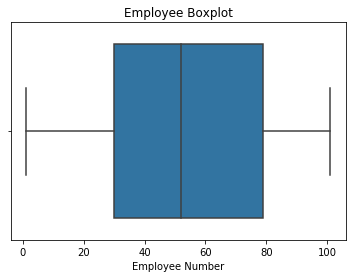

In [6]:
import seaborn as sns
ax=sns.boxplot(data['employee'])
ax.set_title('Employee Boxplot')
ax.set_xlabel('Employee Number');

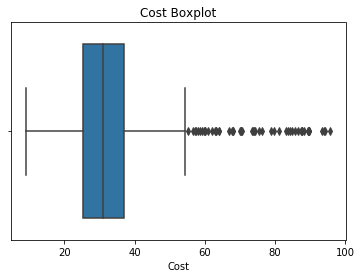

In [7]:
bx=sns.boxplot(data['cost'])
bx.set_title('Cost Boxplot')
bx.set_xlabel('Cost');

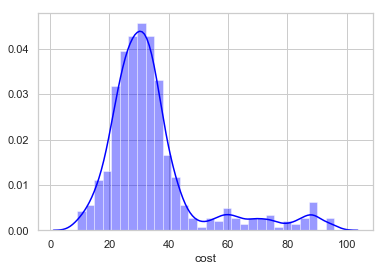

In [41]:
sns.distplot(data['cost'],color='blue')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
employee    500 non-null int64
cost        500 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


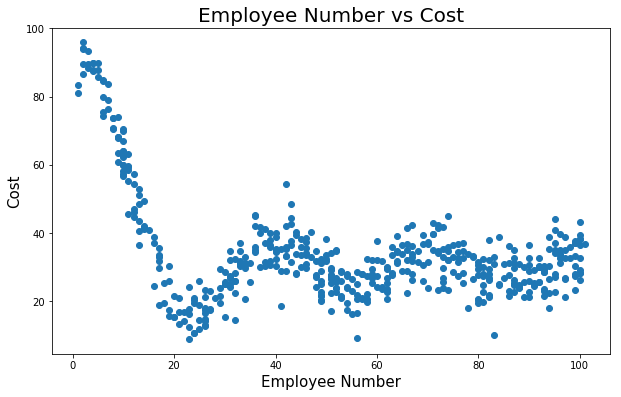

In [9]:
plot=plt.figure(figsize=(10,6))
b=plot.add_subplot(111)
b.scatter(data['employee'],data['cost'])
#c=plot.add_subplot(122)
b.set_title("Employee Number vs Cost",fontsize=20);
b.set_ylabel('Cost',fontsize=15)
b.set_xlabel('Employee Number',fontsize=15);

# Modeling

In [10]:
#Run Cross Validation
x_train,x_test,y_train,y_test=train_test_split(data.employee,data.cost
                                              ,test_size=0.2,random_state=13)
#Regression predictive modeling
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier() #Random Forest
from sklearn.ensemble import GradientBoostingClassifier ## Gradient Boosting Classifier
gbc=GradientBoostingClassifier(n_estimators=10)

L=LinearRegression()
ridgereg=Ridge(alpha=1.0)
lassoreg=linear_model.Lasso()
names=['LinearRegression','Lasso','Ridge']
algorithms=[L,lassoreg,ridgereg]
def rotation(x,y,x_,y_,algorithms_,names):
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(x,y)
    R2=[]
    Mean_square_error=[]
        
    for i in range(len(algorithms)):
        R2.append(r2_score(y_,algorithms[i].predict(x_)))
        Mean_square_error.append(
                (mean_squared_error(y_test,algorithms[i].predict(x_)))**0.5)
    metrics=pd.DataFrame(columns=['R_2','Mean Square Error'], index=names)
    metrics['R_2']=R2
    metrics['Mean Square Error']=Mean_square_error
    return metrics.sort_values('R_2', ascending=False)

In [11]:
rotation(x_train.to_frame(),y_train.to_frame(),
         x_test.to_frame(),y_test.to_frame(),algorithms,names)

,R_2,Mean Square Error
Lasso,0.154708,14.073788
Ridge,0.154458,14.075871
LinearRegression,0.154458,14.075872


# Random Forest 

In [12]:
from sklearn import preprocessing
from sklearn import utils
#transform float into integer 
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded=lab_enc.fit_transform(y_test)

In [13]:
gbc.fit(x_train.to_frame(),y_train_encoded)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [14]:
r2_score(y_test_encoded,gbc.predict(x_test.to_frame()))

-30.123624362436242

In [15]:
algorithms_Classifier=[r,gbc]
names_Classifier=['Random Forest','gradient boosting']
def rotation_classifier(x,y,x_,y_,algorithms,names):
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(x,y)
    R2=[]
    Mean_square_error=[]
        
    for i in range(len(algorithms)):
        R2.append(r2_score(y_,algorithms[i].predict(x_)))
        Mean_square_error.append(
                (mean_squared_error(y_test,algorithms[i].predict(x_)))**0.5)
    metrics=pd.DataFrame(columns=['R_2','Mean Square Error'], index=names)
    metrics['R_2']=R2
    metrics['Mean Square Error']=Mean_square_error
    return metrics.sort_values('R_2', ascending=False)

In [16]:
rotation_classifier(x_train.to_frame(),y_train_encoded,x_test.to_frame(),y_test_encoded,algorithms_Classifier,
                   names_Classifier)

,R_2,Mean Square Error
gradient boosting,-30.123624,180.107395
Random Forest,-32.461950,184.255059


In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly_7=PolynomialFeatures(degree=7)
x_poly_train=poly_7.fit_transform(x_train.reshape(-1, 1))
x_poly_test=poly_7.fit_transform(x_test.reshape(-1, 1))
L.fit(x_poly_train,y_train.reshape(-1, 1))
r2_score(L.predict(x_poly_test),y_test),mean_squared_error(L.predict(x_poly_test),y_test.to_frame())**0.5

/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


(0.72355350410471764, 7.381009862893066)

# Employee Number vs Cost Per Compnay

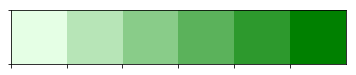

In [19]:
sns.palplot(sns.light_palette("green"))

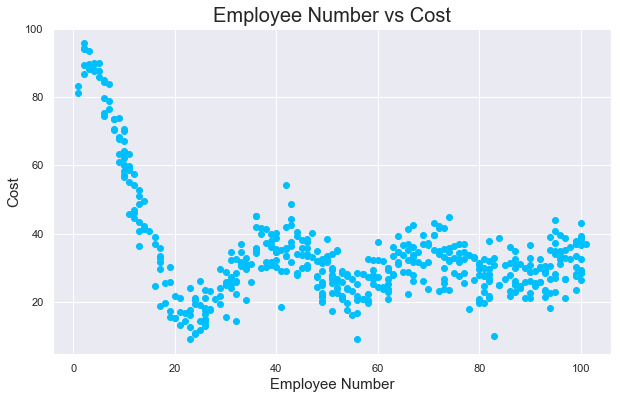

In [20]:
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
plot=plt.figure(figsize=(10,6))
b=plot.add_subplot(111)
b.scatter(data['employee'],data['cost'],color='deepskyblue')
#c=plot.add_subplot(122)
b.set_title("Employee Number vs Cost",fontsize=20);
b.set_ylabel('Cost',fontsize=15)
b.set_xlabel('Employee Number',fontsize=15);

# Linear Regression Plot

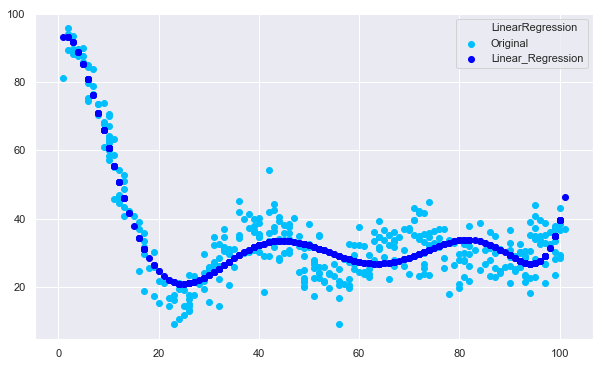

In [21]:
from matplotlib.patches import Rectangle
plot=plt.figure(figsize=(10,6))
original_plot=plt.scatter(x_train,y_train,color='deepskyblue');
model_linear_plot=plt.scatter(x_train,L.predict(x_poly_train),color='b');
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, original_plot, model_linear_plot], ("LinearRegression", "Original", "Linear_Regression"));

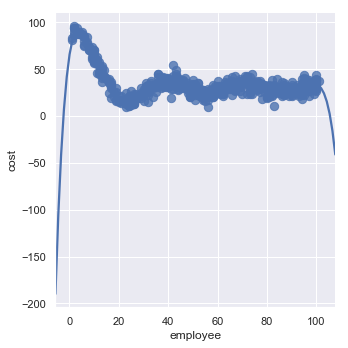

In [22]:
anscombe=sns.load_dataset("anscombe")
sns.lmplot(x="employee",y="cost",data=data,order=8,ci=None,scatter_kws={"s":70});

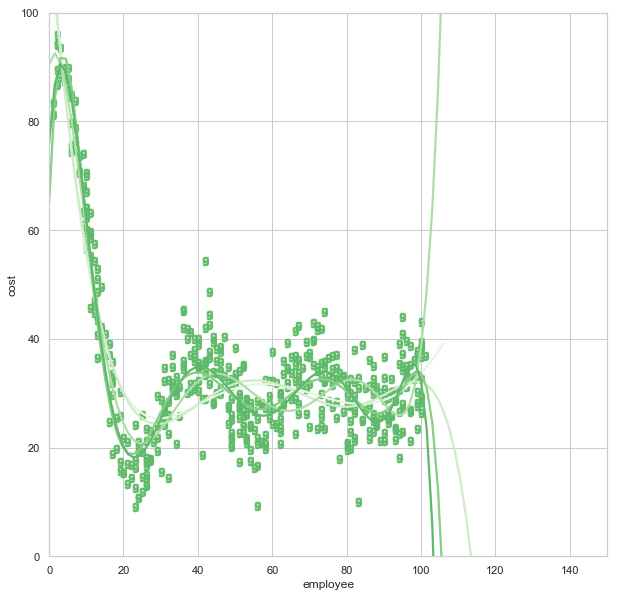

In [23]:
plt.figure(figsize=(10,10))

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Greens", 8))
from scipy.ndimage.filters import gaussian_filter1d

for i in range(5,10,1):
    lm=sns.regplot(x="employee",y="cost",data=data,order=i,ci=None,scatter_kws={"s":70},marker="$%s$" % str(i))
    axes=lm.axes
    axes.set_ylim(0,100)
    axes.set_xlim(0,150)

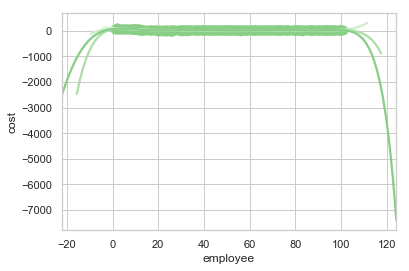

In [24]:
fig, axs = plt.subplots(ncols=1)
sns.regplot(x="employee",y="cost",data=data,order=5,ci=None,scatter_kws={"s":70});
sns.regplot(x="employee",y="cost",data=data,order=7,ci=None,scatter_kws={"s":80})
sns.regplot(x="employee",y="cost",data=data,order=8,ci=None,scatter_kws={"s":70})
sns.regplot(x="employee",y="cost",data=data,order=9,ci=None,scatter_kws={"s":70});

# Confidence Interval

In [25]:
poly_9=PolynomialFeatures(degree=9)
x_poly_train=poly_9.fit_transform(data['employee'].reshape(-1, 1))
L.fit(x_poly_train,data['cost'].reshape(-1, 1))

/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
data_plot=pd.DataFrame({})
prediction=L.predict(x_poly_train)
data_plot['polynomial_n_9']=prediction.mean(axis=1)
# calculate the confidence interval 
from scipy.stats import sem,t
from scipy import mean
confidence=0.95
n=len(L.predict(x_poly_train).tolist())
std_err=sem(L.predict(x_poly_train).tolist())
h=std_err * t.ppf((1 + confidence) / 2, n - 1)
h

array([ 1.33214664])

In [27]:
#prediction interval
std_error_prediction=sem(data['cost'].tolist())
h_prediction=std_error_prediction * t.ppf((1 + confidence) / 2, n - 1)
h_prediction

1.4216753672814728

In [28]:
x_poly_train

array([[  1.00000000e+00,   8.00000000e+01,   6.40000000e+03, ...,
          2.09715200e+13,   1.67772160e+15,   1.34217728e+17],
       [  1.00000000e+00,   6.50000000e+01,   4.22500000e+03, ...,
          4.90222789e+12,   3.18644813e+14,   2.07119128e+16],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00, ...,
          1.28000000e+02,   2.56000000e+02,   5.12000000e+02],
       ..., 
       [  1.00000000e+00,   8.00000000e+01,   6.40000000e+03, ...,
          2.09715200e+13,   1.67772160e+15,   1.34217728e+17],
       [  1.00000000e+00,   9.90000000e+01,   9.80100000e+03, ...,
          9.32065348e+13,   9.22744694e+15,   9.13517247e+17],
       [  1.00000000e+00,   9.40000000e+01,   8.83600000e+03, ...,
          6.48477594e+13,   6.09568939e+15,   5.72994802e+17]])

In [29]:
L.predict(poly_9.fit_transform(55))-h,L.predict(poly_9.fit_transform(55))+h

(array([[ 24.3144684]]), array([[ 26.97876168]]))

In [30]:
L.predict(poly_9.fit_transform(55))-h_prediction,L.predict(poly_9.fit_transform(55))+h_prediction

(array([[ 24.22493968]]), array([[ 27.06829041]]))

In [31]:
data_plot['CI_low']=prediction.mean(axis=1)-h
data_plot['CI_up']=prediction.mean(axis=1)+h
data_plot['employee']=data['employee']
data_plot.sort_values('employee',inplace=True)
data_plot.head()

,polynomial_n_9,CI_low,CI_up,employee
135,88.442717,87.110571,89.774864,1
184,88.442717,87.110571,89.774864,1
2,88.047018,86.714871,89.379164,2
114,88.047018,86.714871,89.379164,2
316,88.047018,86.714871,89.379164,2


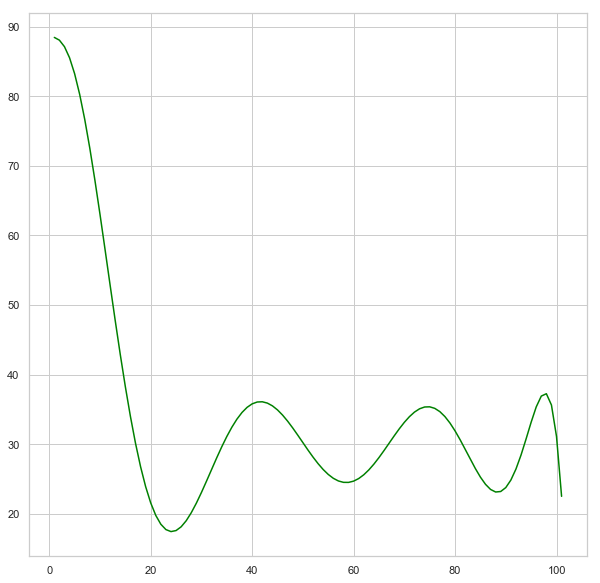

In [32]:
plt.figure(figsize=(10,10))
plt.plot(data_plot['employee'],data_plot['polynomial_n_9'],color='green')


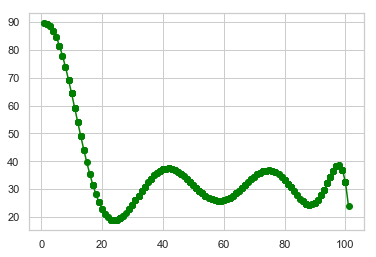

In [33]:
plt.scatter(data_plot['employee'],data_plot['CI_up'],color='green')
plt.plot(data_plot['employee'],data_plot['CI_up'],color='green')
plt.show()

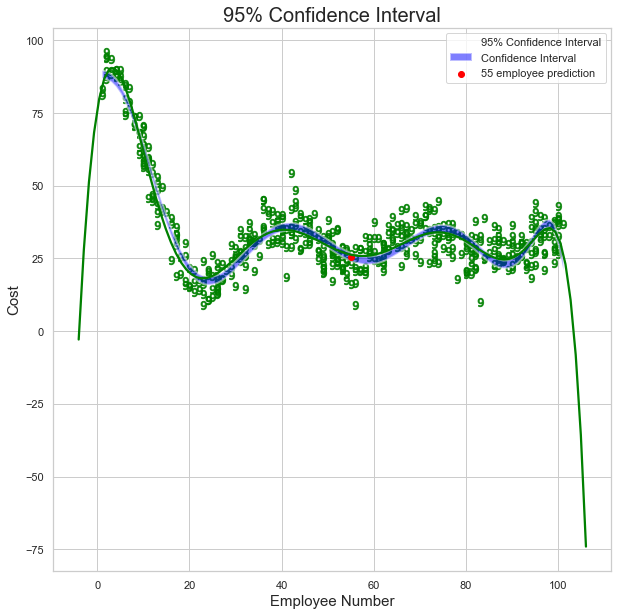

In [34]:
from matplotlib.patches import Rectangle
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
sns.set_style("whitegrid")
sns.regplot(x="employee",y="cost",data=data,order=9,ci=None,scatter_kws={"s":70},marker="$%s$" % str(9),color='green');
bx=ax.fill_between(data_plot['employee'], data_plot['CI_low'], data_plot['CI_up'],lw=2, facecolor='blue',alpha=0.5,
                   );
cx=plt.scatter(55,25.64,color='red')
#plt.legend(label='95% Confidence Interval')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax.legend([extra, bx,cx], ("95% Confidence Interval", "Confidence Interval",'55 employee prediction'));
ax.set_title("95% Confidence Interval",fontsize=20);
ax.set_ylabel('Cost',fontsize=15)
ax.set_xlabel('Employee Number',fontsize=15);
plt.show()